In [1]:
from datascience import *
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Introduction to Clustering
[Scikit-learn](http://scikit-learn.org/stable/) is a python package that can help you to do more advanced predictive and exploratory analysis with data. Today we are going to learn about a [clustering method](http://scikit-learn.org/stable/modules/clustering.html#k-means) used for systematically grouping similar datapoints.

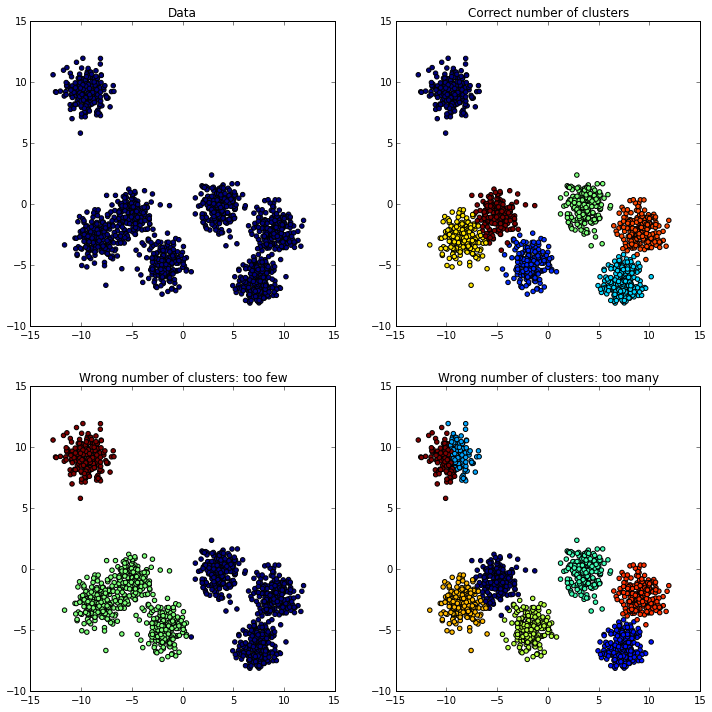

In [5]:
plt.figure(figsize=(12, 12))

n_samples = 1500
n_blobs = 7

random_state = 33


X, y = make_blobs(n_samples=n_samples, centers=n_blobs, random_state=random_state)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=np.ones(n_samples))
plt.title("Data")


# Number of clusters
y_pred = KMeans(n_clusters=n_blobs, random_state=random_state).fit_predict(X)

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Correct number of clusters")


y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

plt.subplot(223)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Wrong number of clusters: too few")


y_pred = KMeans(n_clusters=8, random_state=random_state).fit_predict(X)

plt.subplot(224)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Wrong number of clusters: too many")

# Clustering EV users with similar driving and charging patterns

## About the dataset
'EV_soc.csv' contains data on the state of charge (SOC), meaning the % battery remaining, for 1023 Electric Vehicles (EVs). The dataset has the SOC for each car for every 5 minute interval in the day. The driver column indicates the driver id, the day indicates the day of the week, where 1=Sunday. The ##_soc columns each correspond to a 5-min interval of the day.

In this lab we will see how we can use clustering to identify drivers with similar driving and charging habits.


In [3]:
soc = Table.read_table('data/EV_soc.csv')
soc

driver,day,0_soc,0.0833333333333333_soc,0.166666666666667_soc,0.25_soc,0.333333333333333_soc,0.416666666666667_soc,0.5_soc,0.583333333333333_soc,0.666666666666667_soc,0.75_soc,0.833333333333333_soc,0.916666666666667_soc,1_soc,1.08333333333333_soc,1.16666666666667_soc,1.25_soc,1.33333333333333_soc,1.41666666666667_soc,1.5_soc,1.58333333333333_soc,1.66666666666667_soc,1.75_soc,1.83333333333333_soc,1.91666666666667_soc,2_soc,2.08333333333333_soc,2.16666666666667_soc,2.25_soc,2.33333333333333_soc,2.41666666666667_soc,2.5_soc,2.58333333333333_soc,2.66666666666667_soc,2.75_soc,2.83333333333333_soc,2.91666666666667_soc,3_soc,3.08333333333333_soc,3.16666666666667_soc,3.25_soc,3.33333333333333_soc,3.41666666666667_soc,3.5_soc,3.58333333333333_soc,3.66666666666667_soc,3.75_soc,3.83333333333333_soc,3.91666666666667_soc,4_soc,4.08333333333333_soc,4.16666666666667_soc,4.25_soc,4.33333333333333_soc,4.41666666666667_soc,4.5_soc,4.58333333333333_soc,4.66666666666667_soc,4.75_soc,4.83333333333333_soc,4.91666666666667_soc,5_soc,5.08333333333333_soc,5.16666666666667_soc,5.25_soc,5.33333333333333_soc,5.41666666666667_soc,5.5_soc,5.58333333333333_soc,5.66666666666667_soc,5.75_soc,5.83333333333333_soc,5.91666666666667_soc,6_soc,6.08333333333333_soc,6.16666666666667_soc,6.25_soc,6.33333333333333_soc,6.41666666666667_soc,6.5_soc,6.58333333333333_soc,6.66666666666667_soc,6.75_soc,6.83333333333333_soc,6.91666666666667_soc,7_soc,7.08333333333333_soc,7.16666666666667_soc,7.25_soc,7.33333333333333_soc,7.41666666666667_soc,7.5_soc,7.58333333333333_soc,7.66666666666667_soc,7.75_soc,7.83333333333333_soc,7.91666666666667_soc,8_soc,8.08333333333333_soc,8.16666666666667_soc,8.25_soc,8.33333333333333_soc,8.41666666666667_soc,8.5_soc,8.58333333333333_soc,8.66666666666667_soc,8.75_soc,8.83333333333333_soc,8.91666666666667_soc,9_soc,9.08333333333333_soc,9.16666666666667_soc,9.25_soc,9.33333333333333_soc,9.41666666666667_soc,9.5_soc,9.58333333333333_soc,9.66666666666667_soc,9.75_soc,9.83333333333333_soc,9.91666666666667_soc,10_soc,10.0833333333333_soc,10.1666666666667_soc,10.25_soc,10.3333333333333_soc,10.4166666666667_soc,10.5_soc,10.5833333333333_soc,10.6666666666667_soc,10.75_soc,10.8333333333333_soc,10.9166666666667_soc,11_soc,11.0833333333333_soc,11.1666666666667_soc,11.25_soc,11.3333333333333_soc,11.4166666666667_soc,11.5_soc,11.5833333333333_soc,11.6666666666667_soc,11.75_soc,11.8333333333333_soc,11.9166666666667_soc,12_soc,12.0833333333333_soc,12.1666666666667_soc,12.25_soc,12.3333333333333_soc,12.4166666666667_soc,12.5_soc,12.5833333333333_soc,12.6666666666667_soc,12.75_soc,12.8333333333333_soc,12.9166666666667_soc,13_soc,13.0833333333333_soc,13.1666666666667_soc,13.25_soc,13.3333333333333_soc,13.4166666666667_soc,13.5_soc,13.5833333333333_soc,13.6666666666667_soc,13.75_soc,13.8333333333333_soc,13.9166666666667_soc,14_soc,14.0833333333333_soc,14.1666666666667_soc,14.25_soc,14.3333333333333_soc,14.4166666666667_soc,14.5_soc,14.5833333333333_soc,14.6666666666667_soc,14.75_soc,14.8333333333333_soc,14.9166666666667_soc,15_soc,15.0833333333333_soc,15.1666666666667_soc,15.25_soc,15.3333333333333_soc,15.4166666666667_soc,15.5_soc,15.5833333333333_soc,15.6666666666667_soc,15.75_soc,15.8333333333333_soc,15.9166666666667_soc,16_soc,16.0833333333333_soc,16.1666666666667_soc,16.25_soc,16.3333333333333_soc,16.4166666666667_soc,16.5_soc,16.5833333333333_soc,16.6666666666667_soc,16.75_soc,16.8333333333333_soc,16.9166666666667_soc,17_soc,17.0833333333333_soc,17.1666666666667_soc,17.25_soc,17.3333333333333_soc,17.4166666666667_soc,17.5_soc,17.5833333333333_soc,17.6666666666667_soc,17.75_soc,17.8333333333333_soc,17.9166666666667_soc,18_soc,18.0833333333333_soc,18.1666666666667_soc,18.25_soc,18.3333333333333_soc,18.4166666666667_soc,18.5_soc,18.5833333333333_soc,18.6666666666667_soc,18.75_soc,18.8333333333333_soc,18.9166666666667_soc,19_soc,19.0833333333333_soc,19.1666666666667_soc,19.25_soc,19.3333333333333_soc,19.4166666666667_soc,19.5_soc,19.5833333333333_soc,19.6666666666

# Clustering EVs with similar Tuesday Charging Habits

In the following section I grabbed the SOC data where day=3 (Tuesday). The Scikit-learn K-means package does all of the heavy lifting for us, and finds ways to group similar drivers that have the most similar SOC data throughout the day.  I found 5 clusters works well to identify unique driving/charging habbits.

The rolling_window=6 parameter is used to compute the rolling average over a half hour timespan, rather than considering each 5 min interval independently. 



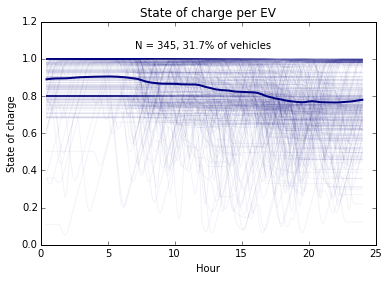

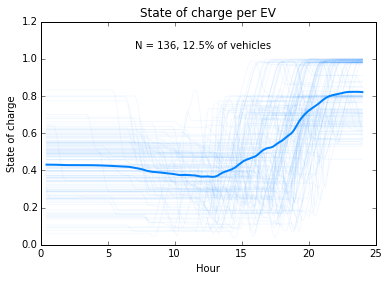

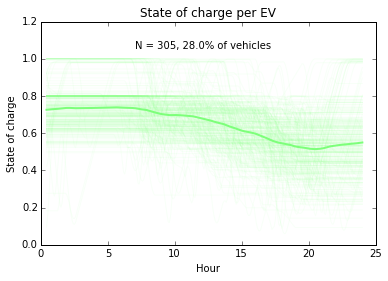

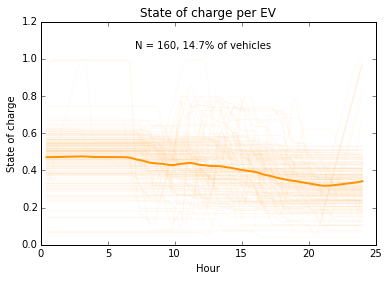

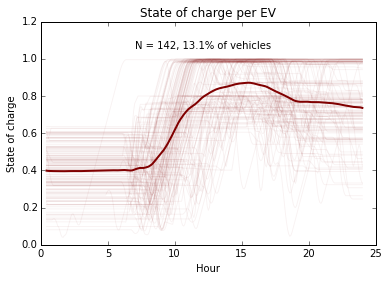

In [4]:
n_clusters=5
rolling_window = 6
soc_tuesday = soc.where('day',3)

#get color map array
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=n_clusters-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
colorVals = [scalarMap.to_rgba(i) for i in range(n_clusters)]


X = soc_tuesday.drop(['driver','day']).to_df()
X_rolling = (pd.rolling_mean(X.T,window=rolling_window)[rolling_window-1::]).T

estimator = KMeans(n_clusters=n_clusters)
estimator.fit(X_rolling)

    
for i in range(n_clusters):
    x_ticks = np.arange(rolling_window-1,289)/12.
    plt.figure()
    data = X_rolling[estimator.labels_==i]
    n = len(data)
    for j in range(data.shape[0]):
        plt.plot(x_ticks,data.T[data.index[j]], color=colorVals[i], alpha=.05)
    plt.plot(x_ticks,np.mean(data), color=colorVals[i], linewidth=2)
    
    plt.xlabel('Hour')
    plt.ylabel('State of charge')
    plt.ylim(0,1.2)
    plt.title('State of charge per EV')
    textstr = 'N = %i, %.1f%% of vehicles'%(n,float(n*100/len(X_rolling)))
    plt.text(7, 1.1, textstr, fontsize=10,verticalalignment='top')



# Overlaying the clusters and plotting the derivatives


In [5]:
def get_slope(y, x):
    dys = y[1:]-y[:-1]
    dxs = x[1:]-x[:-1]
    return dys/dxs


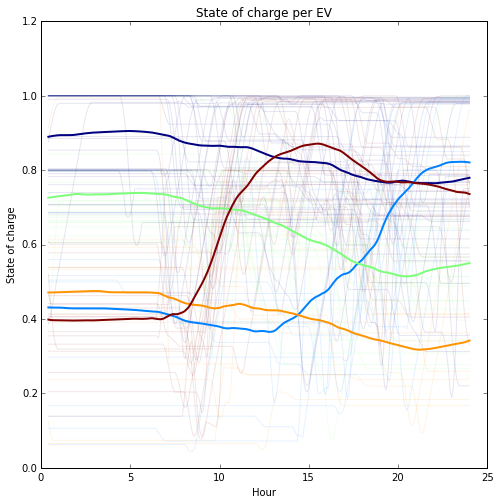

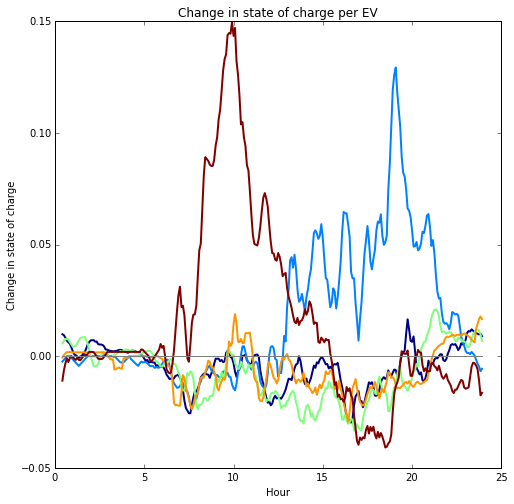

In [6]:
plt.figure(figsize = (8,8))
for i in range(100):
    plt.plot(x_ticks, X_rolling.T[i], color = colorVals[estimator.labels_[i]], alpha=.1)
    
for i in range(n_clusters):
    plt.plot(x_ticks, np.mean(X_rolling[estimator.labels_==i]), 
             color=colorVals[i], linewidth=2)

plt.xlabel('Hour')
plt.ylabel('State of charge')
plt.title('State of charge per EV')


#Plot the derivative
plt.figure(figsize = (8,8))
for i in range(n_clusters):
    dy_dx = get_slope(np.array(np.mean(X_rolling[estimator.labels_==i])), x_ticks)
    plt.plot(x_ticks[:-1], dy_dx, color=colorVals[i], linewidth=2)
    
plt.plot(x_ticks[:-1], np.zeros(len(x_ticks[:-1])), color = 'grey')
plt.xlabel('Hour')
plt.ylabel('Change in state of charge')
plt.title('Change in state of charge per EV')


## Exercise 
My initial thought was that there would maybe be 2 unique charging patterns, one for commuters, and another for families who use EVs as a 2nd vehicle, or non-commuter vehicle. 

**Task 1 -** In the above code blocks, adjust the number of clusters to 2 and describe the trends in the two clusters. 

**Task 2 -** Now adjust the number of clusters to 10. Do you see multiple clusters that show very similar SOC patterns? If so then these can probably be combined, and we can reduce the number of clusters.

In [7]:
# Your answers here:



# Clustering behavior for the whole workweek
In the previous section we clustered EV data for a single work day. Now we will look to cluster similar driving and charging behacior for the whole workweek. Each row in 'workweek_soc.csv' contains EV SOC data for the entire workweek rather than a single day. 

Again I found that 5 clusters seemed to capture the unique charging behavior well. Run the code below to see the workweek clustering results.

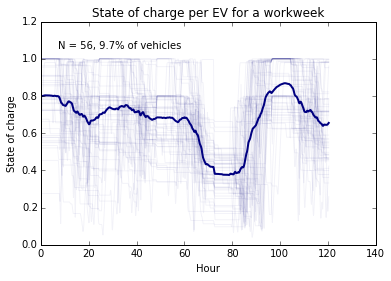

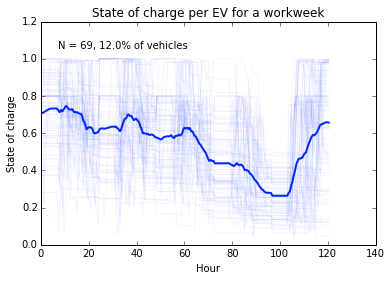

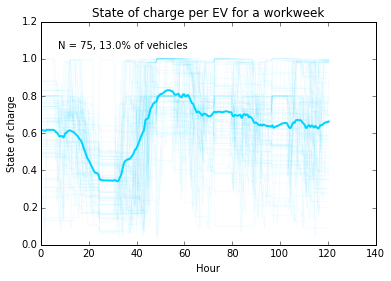

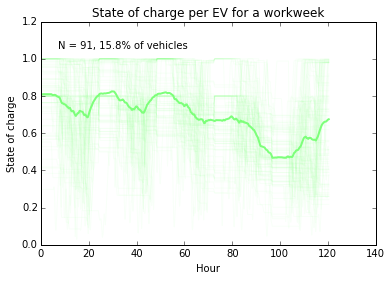

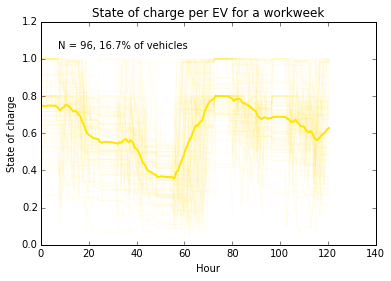

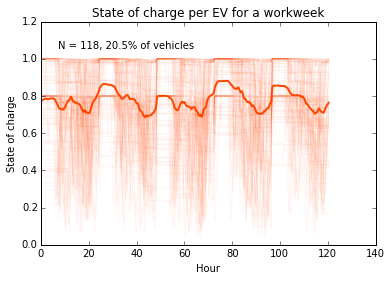

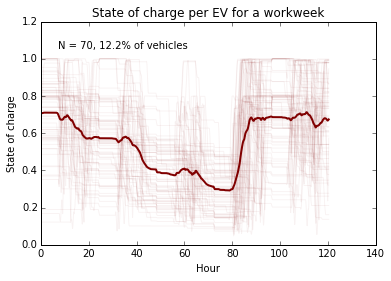

In [6]:
week_soc = Table.read_table('data/workweek_soc.csv')
week_df = week_soc.drop('driver').to_df()

n_clusters=7
rolling_window = 6

#get color map array
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=n_clusters-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
colorVals = [scalarMap.to_rgba(i) for i in range(n_clusters)]


X_rolling = (pd.rolling_mean(week_df.T,window=rolling_window)[rolling_window-1::]).T

estimator = KMeans(n_clusters=n_clusters)
estimator.fit(X_rolling)

    
for i in range(n_clusters):
    x_ticks = np.arange(rolling_window-1,289*5)/12.
    plt.figure()
    data = X_rolling[estimator.labels_==i]
    n = len(data)
    for j in range(data.shape[0]):
        plt.plot(x_ticks,data.T[data.index[j]], color=colorVals[i], alpha=.05)
    plt.plot(x_ticks,np.mean(data), color=colorVals[i], linewidth=2)
    
    plt.xlabel('Hour')
    plt.ylabel('State of charge')
    plt.title('State of charge per EV for a workweek')
    textstr = 'N = %i, %.1f%% of vehicles'%(n,float(n*100/len(X_rolling)))
    plt.text(7, 1.1, textstr, fontsize=10,verticalalignment='top')


# Overlaying workweek SOC plots

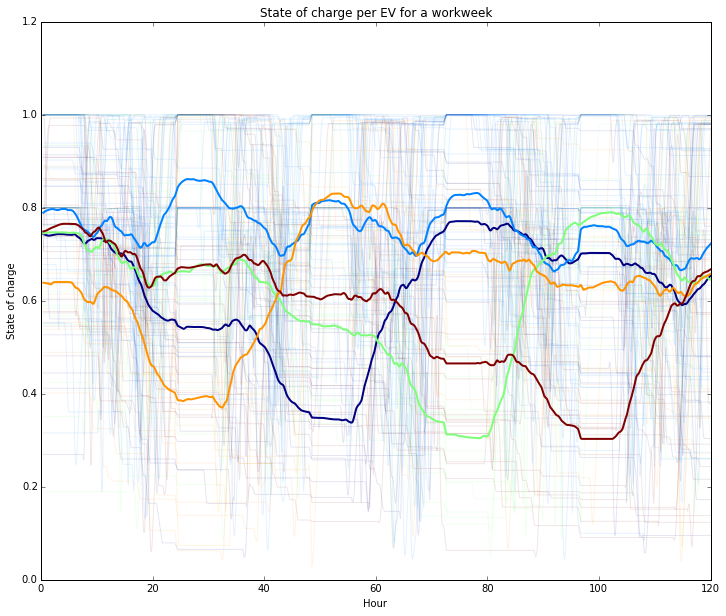

In [9]:
plt.figure(figsize=(12,10))
for i in range(100):
    plt.plot(x_ticks, X_rolling.T[i], color = colorVals[estimator.labels_[i]], alpha=.1)
    
for i in range(n_clusters):
    plt.plot(x_ticks, np.mean(X_rolling[estimator.labels_==i]), color=colorVals[i], linewidth=2)

    
plt.xlabel('Hour')
plt.xlim(0,24*5)
plt.ylabel('State of charge')
plt.title('State of charge per EV for a workweek')


## Exercise  

**Task -** Come up with a very brief description of the driving/charging behavior for each of the clusters shown above. For example, one such description might be 'Friday chargers' or 'evening chargers'.

In [10]:
# Your answer here